# Sentiment Analysis continental beaches of Chile

Installing Transformers and dependencies

In [ ]:
!pip install transformers 

In [2]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification #Tokens
import torch # PyTorch

In [3]:
# For plots(histograms) and fix tables
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Using a BERT Model of NLPtown. They train the model with reviews from 1-5 in different languages.

In [4]:
tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

In [5]:
tokens = tokenizer.encode('I hate this beach!', return_tensors='pt')

In [6]:
tokens

tensor([[  101,   151, 39487, 10372, 14575,   106,   102]])

In [7]:
result = model(tokens)

In [8]:
# Function that evaluates all reviews in data frames  
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

## Analysis of 8 chilean beach reviews in english and spanish

1. Playa Reñaca

In [9]:
renaca = pd.read_csv("renaca.csv")

In [10]:
#df
renaca

,review
0,"Primera vez en la zona. Viña me gustó, Reñaca ..."
1,Reñaca está ubicada al norte de la comuna de v...
2,"Hace años que venimos a esta playa, claramente..."
3,La playa está generalmente limpia y es espacio...
4,"Es amplia, limpia y linda. Sin dudas la mejor ..."
5,"Lindas playas , tienen cartel de prohibido bañ..."
6,"Linda playa para caminar, para tomar sol y div..."
7,"Bonita playa,para descansar, tranquilo en fami..."
8,"Creo que es la única buena playa de Viña, aunq..."
9,"Playas muy tranquilas y limpias, con seguridad..."


In [11]:
#Adding a column to the data frame scoring the review (1-5) called "sentiment"
renaca['sentiment'] = renaca['review'].apply(lambda x: sentiment_score(x[:512]))

In [12]:
# Data Frame with a review and sentiment column
renaca

,review,sentiment
0,"Primera vez en la zona. Viña me gustó, Reñaca ...",3
1,Reñaca está ubicada al norte de la comuna de v...,4
2,"Hace años que venimos a esta playa, claramente...",5
3,La playa está generalmente limpia y es espacio...,3
4,"Es amplia, limpia y linda. Sin dudas la mejor ...",4
5,"Lindas playas , tienen cartel de prohibido bañ...",1
6,"Linda playa para caminar, para tomar sol y div...",4
7,"Bonita playa,para descansar, tranquilo en fami...",4
8,"Creo que es la única buena playa de Viña, aunq...",3
9,"Playas muy tranquilas y limpias, con seguridad...",5


In [13]:
# Summary 
renaca.describe()

,sentiment
count,21.000000
mean,4.000000
std,1.048809
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [14]:
# Counting the values
pd.value_counts(renaca["sentiment"])

5    8
4    7
3    5
1    1
Name: sentiment, dtype: int64

In [15]:
# Ploting a histogram
yrenaca = renaca["sentiment"].values

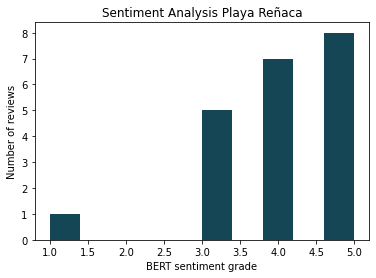

In [17]:
plt.hist(yrenaca, color = '#154656')
plt.title('Sentiment Analysis Playa Reñaca')
plt.xlabel('BERT sentiment grade')
plt.ylabel('Number of reviews')
plt.savefig('renaca.png', dpi=100)
plt.show()

2. Playa Cavancha

In [ ]:
cavancha = pd.read_csv("cavancha.csv")
cavancha

In [19]:
#Adding a column to the data frame scoring the review (1-5) called "sentiment"
cavancha['sentiment'] = cavancha['review'].apply(lambda x: sentiment_score(x[:512]))

In [20]:
cavancha

,review,sentiment
0,Cavancha es la playa ubicada en pleno centro d...,4
1,Excelente lugar para la familia. Playa Cavanch...,5
2,"Lleno de quitasoles que arriendan, no dejan es...",1
3,Es una playa amplia con muchas actividades par...,4
4,Excelente playa donde puedes caminar libre en ...,5
5,"Muy buena playa, bien cuidada, limpia y el pa...",5
6,Bajamos a la playa. bastante mas limpia que ha...,2
7,"Puedes realizar largas caminatas, disfrutando ...",5
8,Sitio muy bonito para correr en la mañana y lu...,4
9,"Playa totalmente llena, muchos niños jugando e...",5


In [21]:
# Summary 
cavancha.describe()

,sentiment
count,21.0
mean,4.0
std,1.0
min,1.0
25%,4.0
50%,4.0
75%,5.0
max,5.0


In [22]:
# Counting the values
pd.value_counts(cavancha["sentiment"])

4    12
5     6
1     1
2     1
3     1
Name: sentiment, dtype: int64

In [23]:
# Ploting a histogram
ycavancha = cavancha["sentiment"].values

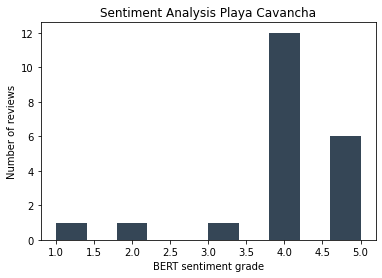

In [24]:
plt.hist(ycavancha, color = '#354656')
plt.title('Sentiment Analysis Playa Cavancha')
plt.xlabel('BERT sentiment grade')
plt.ylabel('Number of reviews')
plt.savefig('cavancha.png', dpi=100)
plt.show()

3. Playa Punta de Lobos

In [ ]:
lobos = pd.read_csv("lobos.csv")
lobos

In [26]:
#Adding a column to the data frame scoring the review (1-5) called "sentiment"
lobos['sentiment'] = lobos['review'].apply(lambda x: sentiment_score(x[:512]))

In [27]:
lobos

,review,sentiment
0,"Es un lugar hermoso, que provoca volver cada d...",5
1,Lugar precioso con vistas al Pacífico de posta...,3
2,"Cafes, foodtrucks, alojamientos, restaurantes,...",5
3,"Un lugar maravilloso, donde puedes reconectar ...",5
4,Fuimos de paseo primero para conocer los acant...,5
5,"En un lugar magico ,muy bien cuidado y la pano...",5
6,"Lindo paisaje, hay la posiblidad de hacer herm...",5
7,"hermoso lugar, magico ver a cada surfista , be...",5
8,Pararse en los miradores de Punta de Lobos a o...,5
9,"Linda vista, lugar hermoso para hscer fotos y ...",5


In [28]:
# Summary 
lobos.describe()

,sentiment
count,20.000000
mean,4.600000
std,0.680557
min,3.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [29]:
# Counting the values
pd.value_counts(lobos["sentiment"])

5    14
4     4
3     2
Name: sentiment, dtype: int64

In [30]:
# Ploting a histogram
ylobos = lobos["sentiment"].values

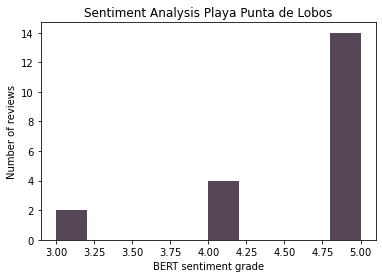

In [31]:
plt.hist(ylobos, color = '#554656')
plt.title('Sentiment Analysis Playa Punta de Lobos')
plt.xlabel('BERT sentiment grade')
plt.ylabel('Number of reviews')
plt.savefig('lobos.png', dpi=100)
plt.show()

4. Playa Zapallar

In [ ]:
#df
zapallar = pd.read_csv("zapallar.csv")
zapallar

In [33]:
#Adding a column to the data frame scoring the review (1-5) called "sentiment"
zapallar['sentiment'] = zapallar['review'].apply(lambda x: sentiment_score(x[:512]))

In [34]:
# Data Frame with a review and sentiment column
zapallar

,review,sentiment
0,"La playa de zapallar es única, una de las más ...",4
1,"es mi refugio, mi casa desde mi niñez.... ador...",5
2,No hay tanta gente como en otras playas. Muy l...,5
3,Linda vista y lugar tranquilo. Un excelente ba...,5
4,Zapallar tiene una playa muy linda con sendero...,5
5,Puedes disfrutar su playa con tranquilidad; ar...,4
6,"Excelente playa, ideal para nadar y pasar el d...",5
7,"Preocupación por el cliente, muy buena atenció...",4
8,"La playa me encanto, súper limpia, tranquila y...",5
9,"Es una playa pequeña muy acogedora, limpia las...",5


In [35]:
# Summary 
zapallar.describe()

,sentiment
count,20.000000
mean,4.550000
std,0.604805
min,3.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [36]:
# Counting the values
pd.value_counts(zapallar["sentiment"])

5    12
4     7
3     1
Name: sentiment, dtype: int64

In [37]:
# Ploting a histogram
yzapallar = zapallar["sentiment"].values

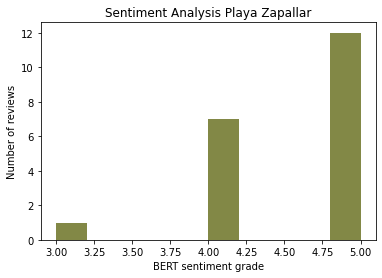

In [38]:
plt.hist(yzapallar, color = '#828846')
plt.title('Sentiment Analysis Playa Zapallar')
plt.xlabel('BERT sentiment grade')
plt.ylabel('Number of reviews')
plt.savefig('zapallar.png', dpi=100)
plt.show()

5. Playa La Virgen

In [ ]:
#df
virgen = pd.read_csv("virgen.csv")
virgen

In [40]:
#Adding a column to the data frame scoring the review (1-5) called "sentiment"
virgen['sentiment'] = virgen['review'].apply(lambda x: sentiment_score(x[:512]))

In [41]:
virgen

,review,sentiment
0,Llegamos al camping el lunes 21 de febrero muy...,5
1,"Hermosa playa de arenas blancas, oleaje tranqu...",5
2,"Sin duda alguna, Playa La Virgen es la mejor p...",5
3,"Muy buena experiencia en Playa La Virgen, exce...",5
4,"Lugar paradisíaco, muy bueno el camping, muy b...",5
5,"Soy campista regular de esta playa, visitándol...",4
6,Amo el camping de playa la virgen.La desconexi...,5
7,"Espectacular estadía, cabaña de lujo, limpia, ...",5
8,"Un lugar mágico, limpio, bien cuidado (no perm...",5
9,Este año fue la segunda vez que veraneamos en ...,5


In [42]:
# Summary 
virgen.describe()

,sentiment
count,20.000000
mean,4.150000
std,1.225819
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


In [44]:
# Counting the values
pd.value_counts(virgen["sentiment"])

5    12
3     4
4     2
2     1
1     1
Name: sentiment, dtype: int64

In [45]:
# Ploting a histogram
yvirgen = virgen["sentiment"].values

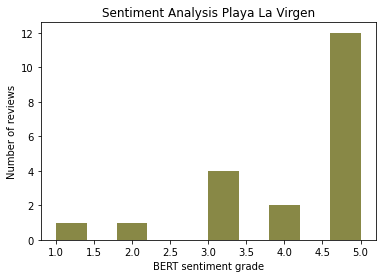

In [46]:
plt.hist(yvirgen, color = '#888846')
plt.title('Sentiment Analysis Playa La Virgen')
plt.xlabel('BERT sentiment grade')
plt.ylabel('Number of reviews')
plt.savefig('virgen.png', dpi=100)
plt.show()

6. Totoralillo

In [48]:
#df
totoralillo = pd.read_csv("totoralillo.csv")

In [49]:
#Adding a column to the data frame scoring the review (1-5) called "sentiment"
totoralillo['sentiment'] = totoralillo['review'].apply(lambda x: sentiment_score(x[:512]))

In [50]:
totoralillo

,review,sentiment
0,"Malaaaaaa, Playa chica, llena de rocas Malos b...",1
1,La playa en si es un espectáculo. Lo que es TE...,1
2,"Es una hermosa playa, la facilidad para estaci...",5
3,"El lugar es hermoso, pero la intervención huma...",1
4,Es un lugar maravilloso y paradisiaco. El ento...,4
5,"Es una de mis playas favoritas en Chile, nada ...",5
6,"Playa de un azul muy lindo, no es taan helada,...",5
7,"Playa muy bonita, estaba muy lleno pero igual ...",4
8,"Playa de arena blanca (no conchilla), playa mu...",4
9,Playa muy bonita. Agua turquesa y para nada fr...,2


In [51]:
# Summary 
totoralillo.describe()

,sentiment
count,20.000000
mean,3.600000
std,1.602629
min,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,5.000000


In [52]:
# Counting the values
pd.value_counts(totoralillo["sentiment"])

5    8
4    6
1    4
2    2
Name: sentiment, dtype: int64

In [53]:
# Ploting a histogram
ytotoralillo = totoralillo["sentiment"].values

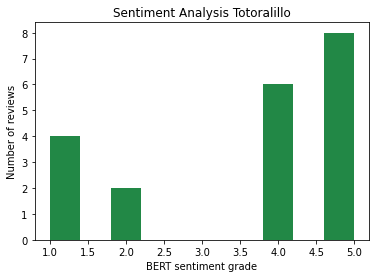

In [54]:
plt.hist(ytotoralillo, color = '#228846')
plt.title('Sentiment Analysis Totoralillo')
plt.xlabel('BERT sentiment grade')
plt.ylabel('Number of reviews')
plt.savefig('totoralillo.png', dpi=100)
plt.show()

7. Playa El Canelillo

In [55]:
#df
canelillo = pd.read_csv("canelillo.csv")

In [56]:
#Adding a column to the data frame scoring the review (1-5) called "sentiment"
canelillo['sentiment'] = canelillo['review'].apply(lambda x: sentiment_score(x[:512]))

In [57]:
canelillo

,review,sentiment
0,preciosa de aguas cristalinas y mar tranquilo!...,4
1,"Estaba muy llena la playa, los que van llegand...",2
2,"Es un hermoso lugar, de lejos parece una playa...",2
3,"Crecí visitando Algarrobo desde que nací, pero...",2
4,"Una hermosa playa con vistas inigualables,un b...",5
5,si uno quiere ir hay que estacionar el auto bi...,3
6,Es una playa donde se puede bañar y disfrutar ...,4
7,Lugar con gran potencial para el turismos. Her...,4
8,"La playa es muy linda, paisaje espectacular, a...",2
9,"Segundo año consecutivo que voy, a la playa y ...",5


In [58]:
# Summary 
canelillo.describe()

,sentiment
count,20.000000
mean,3.950000
std,1.190975
min,2.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [59]:
# Counting the values
pd.value_counts(canelillo["sentiment"])

5    9
4    5
2    4
3    2
Name: sentiment, dtype: int64

In [60]:
# Ploting a histogram
ycanelillo = canelillo["sentiment"].values

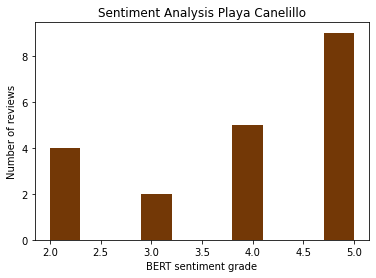

In [61]:
plt.hist(ycanelillo, color = '#733806')
plt.title('Sentiment Analysis Playa Canelillo')
plt.xlabel('BERT sentiment grade')
plt.ylabel('Number of reviews')
plt.savefig('canelillo.png', dpi=100)
plt.show()

8. Bahia Inglesa

In [62]:
#df
bahia = pd.read_csv("bahia.csv")

In [63]:
#Adding a column to the data frame scoring the review (1-5) called "sentiment"
bahia['sentiment'] = bahia['review'].apply(lambda x: sentiment_score(x[:512]))

In [64]:
bahia

,review,sentiment
0,Bahía Inglesa may be the only beaching Chile t...,3
1,Tiny beach definitely worth visiting. We went ...,5
2,Just down the road from Caldera is this gorgeo...,4
3,A 2 star hotel. Is highly rated as Copiapo har...,2
4,"We went there in the spring (October), and it ...",1
5,My boyfriend and I drove here expecting beauti...,2
6,Got the bus from Copiapo(bus station is locate...,4
7,On our way from the San Francisco Pass to Atac...,4
8,I was greatly surprised when I discovered this...,5
9,"Bahia Inglesa is a small, laid back beach vill...",4


In [65]:
# Summary 
bahia.describe()

,sentiment
count,20.000000
mean,3.300000
std,1.301821
min,1.000000
25%,2.000000
50%,3.500000
75%,4.000000
max,5.000000


In [66]:
# Counting the values
pd.value_counts(bahia["sentiment"])

4    6
3    4
5    4
2    4
1    2
Name: sentiment, dtype: int64

In [67]:
# Ploting a histogram
ybahia = bahia["sentiment"].values

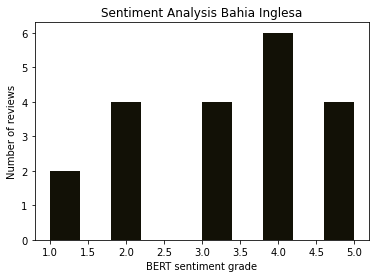

In [68]:
plt.hist(ybahia, color = '#121106')
plt.title('Sentiment Analysis Bahia Inglesa')
plt.xlabel('BERT sentiment grade')
plt.ylabel('Number of reviews')
plt.savefig('bahia.png', dpi=100)
plt.show()

#### Punta de Lobos and Zapallar are the beaches with better perception from visitors (4.6/5.0 and 4.55/5.0 respectively). The lowest scored was Bahia Inglesa with 3.3/5.0

# Separate analysis of english and spanish reviews

1. Only spanish reviews (local and latin american visitors)

In [122]:
#df of spanish reviews
spanish = pd.read_csv("chiespanol.csv")

In [81]:
spanish.dtypes

review    object
dtype: object

In [83]:
spanish.isnull().sum()

review    2
dtype: int64

In [84]:
# removing Null values to work with the model
spanish[spanish["review"].isnull()]

,review
10,NaN
52,NaN


In [86]:
spanish.shape

(83, 1)

In [100]:
# droping the 2 NaN values and saving
spanish.dropna(how='any', inplace=True)

In [101]:
spanish.shape

(81, 1)

In [102]:
#model without NaN
spanish['sentiment'] = spanish['review'].apply(lambda x: sentiment_score(x[:512]))

In [104]:
# Data Frame with a review and sentiment column
spanish.head()

,review,sentiment
0,Bahía Inglesa may be the only beaching Chile t...,3
1,Tiny beach definitely worth visiting. We went ...,5
2,Just down the road from Caldera is this gorgeo...,4
3,A 2 star hotel. Is highly rated as Copiapo har...,2
4,"We went there in the spring (October), and it ...",1


In [105]:
# Summary 
spanish.describe()

,sentiment
count,81.000000
mean,3.987654
std,1.279588
min,1.000000
25%,4.000000
50%,4.000000
75%,5.000000
max,5.000000


In [106]:
# Counting the values
pd.value_counts(spanish["sentiment"])

5    39
4    22
2     8
3     6
1     6
Name: sentiment, dtype: int64

In [107]:
# Ploting a histogram
yspanish = spanish["sentiment"].values

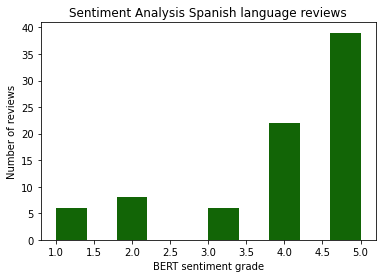

In [108]:
plt.hist(yspanish, color = '#126506')
plt.title('Sentiment Analysis Spanish language reviews')
plt.xlabel('BERT sentiment grade')
plt.ylabel('Number of reviews')
plt.savefig('spanish.png', dpi=100)
plt.show()

2. Only english reviews

In [123]:
#df of english reviews
english = pd.read_csv("chingles.csv")

In [111]:
english.isnull().sum()

review    1
dtype: int64

In [112]:
# Removing null values
english[english["review"].isnull()]

,review
10,NaN


In [113]:
english.dropna(how='any', inplace=True)

In [114]:
english.shape

(82, 1)

In [116]:
#Adding a column to the data frame scoring the review (1-5) called "sentiment"
english['sentiment'] = english['review'].apply(lambda x: sentiment_score(x[:512]))

In [117]:
# Data Frame with a review and sentiment column
english.head()

,review,sentiment
0,"Bahía Inglesa es un lindo lugar, puedes quedar...",5
1,"Muy rica playa, harto comercio, aunque harta g...",4
2,Hace algunos años hice una gran publicación so...,3
3,Sobrevalórada ( culpa de las estupidas fotogra...,2
4,El lugar es agradable con una bonita vista de ...,3


In [118]:
# Summary 
english.describe()

,sentiment
count,82.000000
mean,4.048780
std,1.052949
min,1.000000
25%,4.000000
50%,4.000000
75%,5.000000
max,5.000000


In [119]:
# Counting the values
pd.value_counts(english["sentiment"])

5    34
4    28
3    13
2     4
1     3
Name: sentiment, dtype: int64

In [120]:
# Ploting a histogram
yenglish = english["sentiment"].values

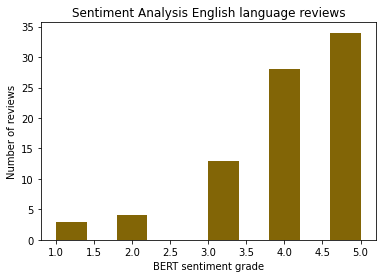

In [121]:
plt.hist(yenglish, color = '#826506')
plt.title('Sentiment Analysis English language reviews')
plt.xlabel('BERT sentiment grade')
plt.ylabel('Number of reviews')
plt.savefig('english.png', dpi=100)
plt.show()

#### Almost the same score between spanish and english reviews (around 4.0/5). The chilean beaches have a good perception of all kind of visitors (local-international). 

# Concat English-Spanish reviews for a global analysis

In [124]:
dfglobal = pd.concat([spanish,english], sort=False)

In [125]:
dfglobal

,review,sentiment
0,Bahía Inglesa may be the only beaching Chile t...,3.0
1,Tiny beach definitely worth visiting. We went ...,5.0
2,Just down the road from Caldera is this gorgeo...,4.0
3,A 2 star hotel. Is highly rated as Copiapo har...,2.0
4,"We went there in the spring (October), and it ...",1.0
...,...,...
77,Beautiful beach with great view and calm ocean...,NaN
78,"It is a nice, small beach without services, on...",NaN
79,"The beach is very beautiful, reminds me of Sou...",NaN
80,this stop was a total surprise on my trip. Thi...,NaN


In [126]:
#Adding a column to the data frame scoring the review (1-5) called "sentiment"
dfglobal['sentiment'] = dfglobal['review'].apply(lambda x: sentiment_score(x[:512]))

In [127]:
# Summary 
dfglobal.describe()

,sentiment
count,163.000000
mean,4.018405
std,1.167843
min,1.000000
25%,4.000000
50%,4.000000
75%,5.000000
max,5.000000


In [128]:
# Counting the values
pd.value_counts(dfglobal["sentiment"])

5    73
4    50
3    19
2    12
1     9
Name: sentiment, dtype: int64

In [129]:
# Ploting a histogram
ydfglobal = dfglobal["sentiment"].values

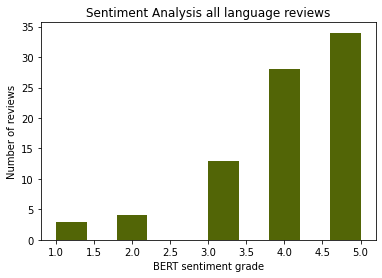

In [130]:
plt.hist(yenglish, color = '#526506')
plt.title('Sentiment Analysis all language reviews')
plt.xlabel('BERT sentiment grade')
plt.ylabel('Number of reviews')
plt.savefig('all.png', dpi=100)
plt.show()